
***Course***  Data mining - Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from numpy import unique
from sklearn.metrics import silhouette_score

# Question 1 and 2

1. Load the dataset and perform exploratory data analysis (EDA).

2. Preprocess the data by calculating the number of rows and columns, number of
missing values, outliers, distribution means, medians, quantiles, scaling,
transformation, visualisation, etc.

In [2]:
df = pd.read_csv("mall_customers_dataset.csv")
df

,Mall_Customers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
1,1,Male,19,15000,39
2,2,Male,21,15000,81
3,3,Female,20,16000,6
4,4,Female,23,16000,77
...,...,...,...,...,...
196,196,Female,35,120000,79
197,197,Female,45,126000,28
198,198,Male,32,126000,74
199,199,Male,32,137000,18


The feature names is in row 1, get them and add as column names.

In [3]:
df.count()

Mall_Customers    201
Unnamed: 1        201
Unnamed: 2        201
Unnamed: 3        201
Unnamed: 4        201
dtype: int64

In [4]:
df_new = pd.DataFrame() 
df_new[df["Mall_Customers"].iloc[0]] = df["Mall_Customers"].iloc[1:].astype(int)
df_new[df["Unnamed: 1"].iloc[0]] = df["Unnamed: 1"].iloc[1:]
df_new[df["Unnamed: 2"].iloc[0]] = df["Unnamed: 2"].iloc[1:].astype(int)
df_new[df["Unnamed: 3"].iloc[0]] = df["Unnamed: 3"].iloc[1:].astype(int)
df_new[df["Unnamed: 4"].iloc[0]] = df["Unnamed: 4"].iloc[1:].astype(int)
df_new

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
1,1,Male,19,15000,39
2,2,Male,21,15000,81
3,3,Female,20,16000,6
4,4,Female,23,16000,77
5,5,Female,31,17000,40
...,...,...,...,...,...
196,196,Female,35,120000,79
197,197,Female,45,126000,28
198,198,Male,32,126000,74
199,199,Male,32,137000,18


In [5]:
df_new.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income ($)         200
Spending Score (1-100)    200
dtype: int64

By compairing the df.count() and df_new.count() can we see that all rows has been added.

In [6]:
df_new.dtypes

CustomerID                 int32
Gender                    object
Age                        int32
Annual Income ($)          int32
Spending Score (1-100)     int32
dtype: object

In [7]:
df_new.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

***No missing values***

In [8]:
#check gender propotions.
df_new["Gender"].value_counts(normalize = True)*100

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [9]:
df_new.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


For each feture can we see that there are no large deviations. 
    
    - Age: Between: 70 and 18 which are normal
    
    - Annual Income: Between 137000 dollar and 15000 dollar. Does also seems good.
    
    - Spending Score: Between 1 and 99 which it should be. 

Just to be sure will the data be explored more, especially Annual income, just to be sure that 137000 is not an outlier.

***Check income***

<AxesSubplot: ylabel='Annual Income ($)'>

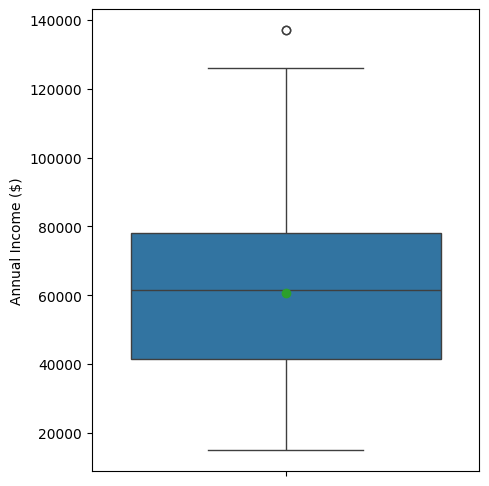

In [10]:
#check boxplot for outliers

plt.figure(figsize=(5,6))
sns.boxplot(y ="Annual Income ($)", data = df_new, showmeans = True, meanprops = {"marker": "o"})

In [11]:
df_new[df_new["Annual Income ($)"] > 120000]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
197,197,Female,45,126000,28
198,198,Male,32,126000,74
199,199,Male,32,137000,18
200,200,Male,30,137000,83


Can see that we have one or more values for male that is in the upper percentile.
I will not regard this as an outlier because for a population will there always be someone that earns much more then the rest of the group.
I also got a relative small dataset, thus by removing data can affect the result. 

### How income and Spending Score is related

Text(0.5, 1.0, 'Annual Income against Spending Score')

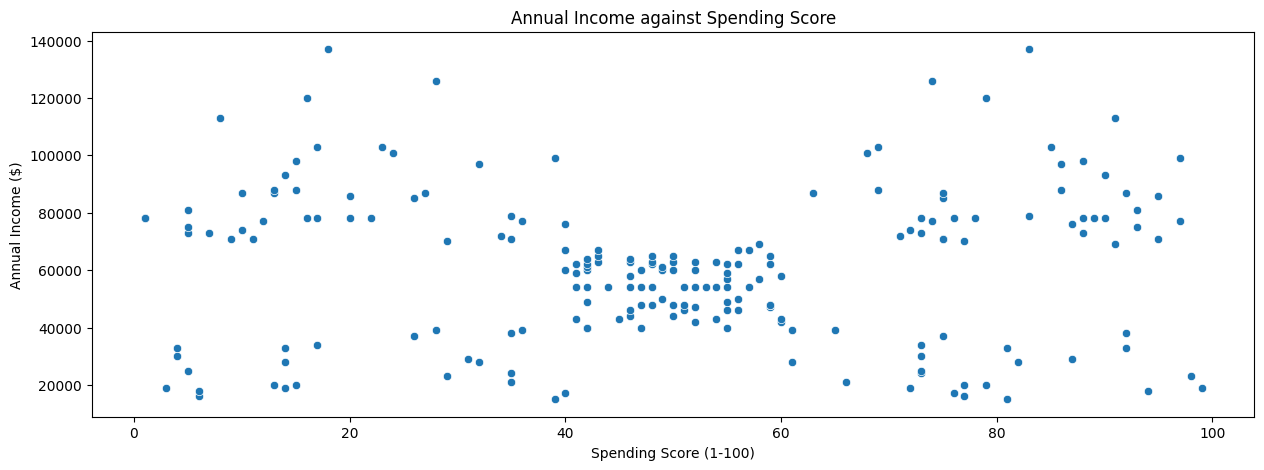

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_new, y = "Annual Income ($)", x = "Spending Score (1-100)")
plt.title("Annual Income against Spending Score")

For annual income against spending score can we see that a spending score between 40 and 60 does have a annual income between ca 50000 and ca 60000, but for the other is the values more spread. It is almost like we have 5 different groups. 

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Annual Income ($)'>

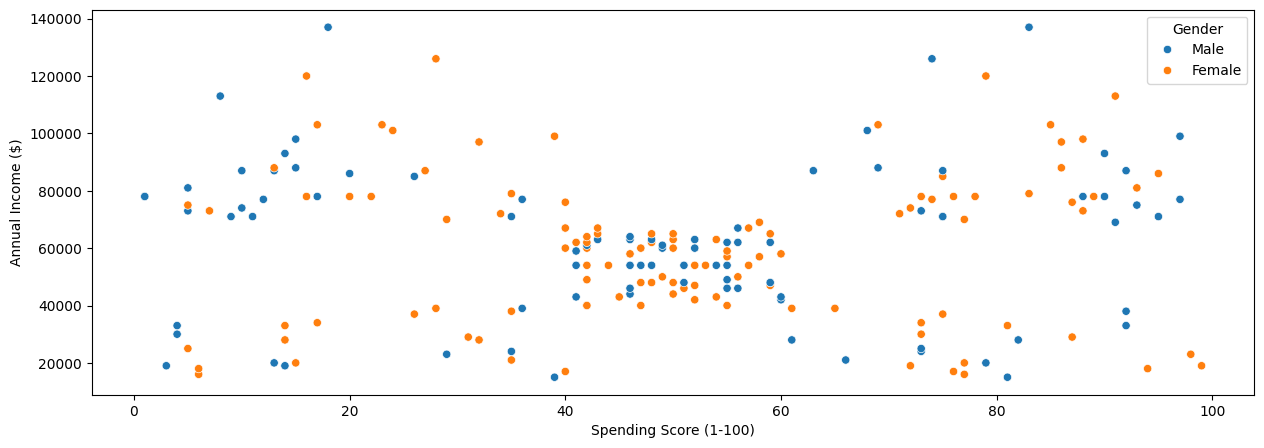

In [13]:
#look with Gender
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_new, y = "Annual Income ($)", x = "Spending Score (1-100)", hue = "Gender")

It seems that female gender is more dominant in higher spending score, but quite hard to see. 

Text(0.5, 1.0, 'Mean value of Spending Score for each gender')

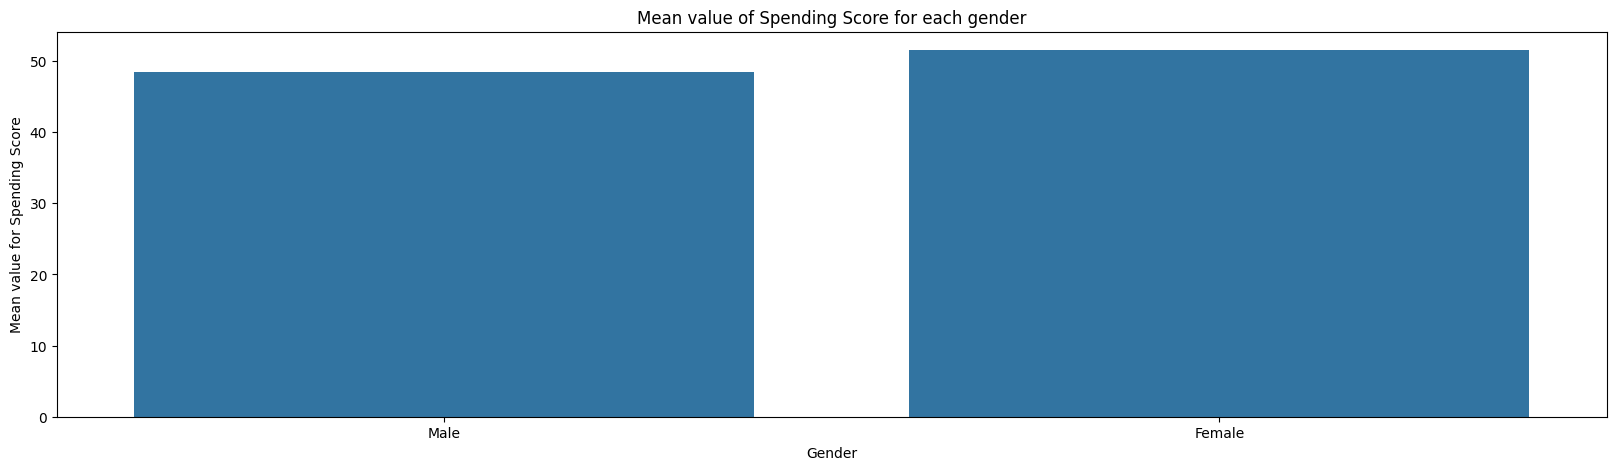

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(data = df_new, x = "Gender",y = "Spending Score (1-100)", errorbar = None)
plt.ylabel("Mean value for Spending Score")
plt.title("Mean value of Spending Score for each gender")

A better picture, which shows that is is almost no difference for spending score between genders.

### Spending Score by Age and Annual Income

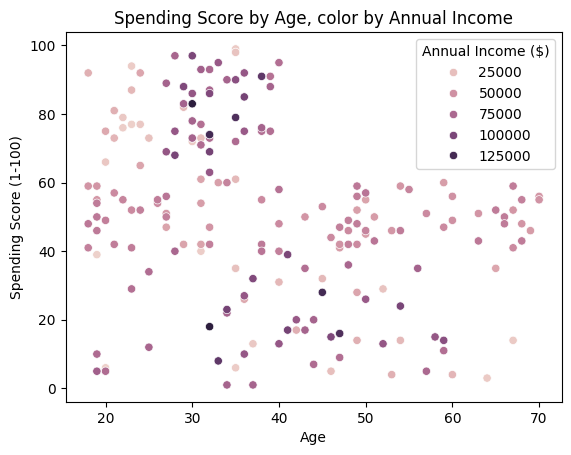

In [15]:
#looking at spending score and age
sns.scatterplot(data = df_new, y = "Spending Score (1-100)", x = "Age", hue = "Annual Income ($)")
plt.title("Spending Score by Age, color by Annual Income")
plt.show()

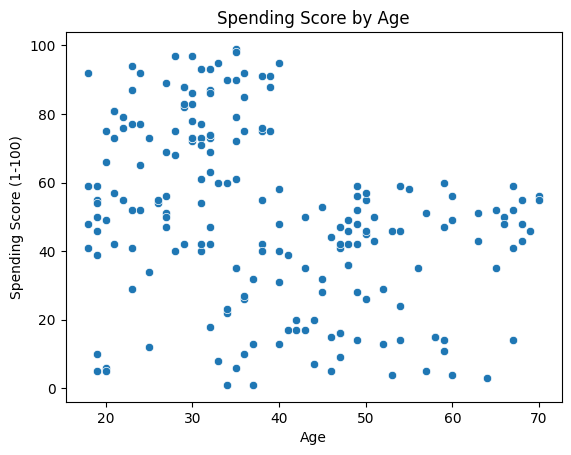

In [16]:
sns.scatterplot(data = df_new, y = "Spending Score (1-100)", x = "Age")
plt.title("Spending Score by Age")
plt.show()

It seems like there are more younger people that has higher spending score, while older people has generaly lower spending score.
The income seems not to matter that much, can see some tendency that higher income, expecial for younger people will spend more. 

***This is further analysed***

In [17]:
#group by age to see if younger age has a higher average spending score or not

age_groups = ["0-10","11-20","21-30","31-40","41-50","51-60","61-70"]
df_new["age_groups"] = pd.cut(df_new.Age, range(0,71,10), labels = age_groups)
df_new

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),age_groups
1,1,Male,19,15000,39,11-20
2,2,Male,21,15000,81,21-30
3,3,Female,20,16000,6,11-20
4,4,Female,23,16000,77,21-30
5,5,Female,31,17000,40,31-40
...,...,...,...,...,...,...
196,196,Female,35,120000,79,31-40
197,197,Female,45,126000,28,41-50
198,198,Male,32,126000,74,31-40
199,199,Male,32,137000,18,31-40


In [18]:
#calculate mean for each group and plot it
mean_score = []
median_score = []
mean_income_list = []
for ageGroup in age_groups:
    mean = df_new[(df_new["age_groups"]== f"{ageGroup}")]["Spending Score (1-100)"].mean()
    median = df_new[(df_new["age_groups"]== f"{ageGroup}")]["Spending Score (1-100)"].median()
    mean_income = df_new[df_new["age_groups"]== f"{ageGroup}"]["Annual Income ($)"].mean()
    mean_score.append(mean)
    median_score.append(median)
    mean_income_list.append(mean_income)

Text(0.5, 0, 'Age groups')

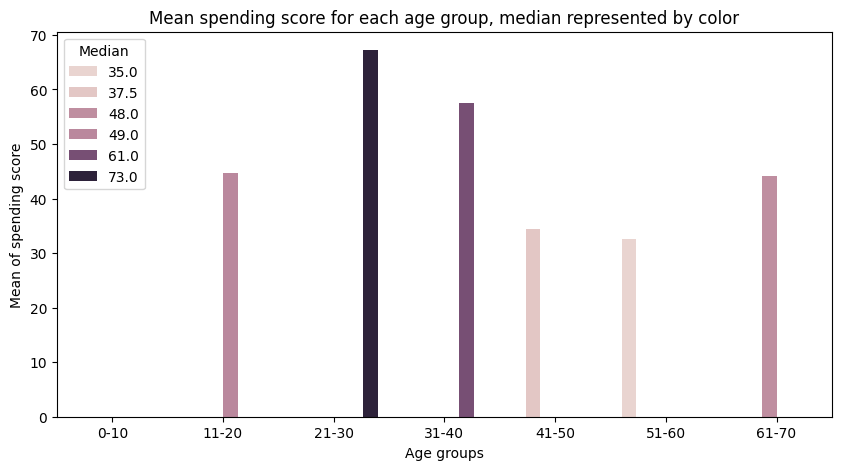

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x = age_groups, y = mean_score, hue = median_score)
plt.title("Mean spending score for each age group, median represented by color")
plt.legend(title = "Median")
plt.ylabel("Mean of spending score")
plt.xlabel("Age groups")

From the picture can we once again see that the spending score seems to be higher for younger people, specific for people between 21-30 and 31-40.
We can also see that the median is similar as the mean, thus the spending seems to be relative even in the groups. 

Text(0.5, 0, 'Age groups')

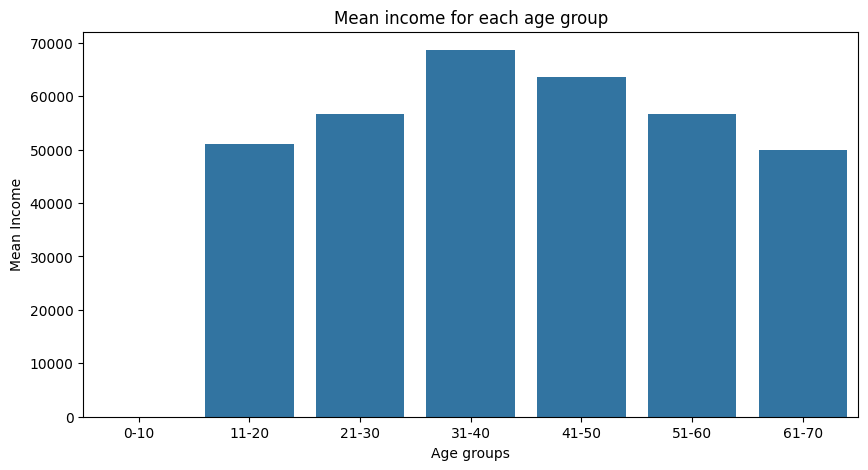

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x = age_groups, y = mean_income_list)
plt.title("Mean income for each age group")
#plt.legend(title = "Median")
plt.ylabel("Mean Income")
plt.xlabel("Age groups")

Here we can see that the age group 31-40 and 41-50 has highest mean income, however, if we look at the graph before ("Mean spending score for each age group, median represented by color") can we see that the highest spending score is in group 21-30 and 31-40 repspective, thus it seems that just because you have a higher income does it not nessecary mean that you spends more. 

This is just mean values and there is a change that people in age group 21-30 has high income and does spend much, this can be hard to se here. This is just a first observation, more statistical analyses should be done to see if this is significant true.

In [21]:
#drop age groups for futher analyses, wont need them more. 
df_new.drop("age_groups", axis = 1, inplace = True)
#will also drop custumer ID, this will also not be needed. 
df_new.drop("CustomerID", axis = 1, inplace = True)

In [22]:
#drop genders to, will not use these for the clustering
df_new.drop("Gender", axis = 1, inplace = True)

### Look at covariance, correlations and variance

In [23]:
#scaling before to not affect the covarance and correlation
#the variables are on different "scales" ex annual income is much higher then age and spending score.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#transform age
transform = scaler.fit_transform(df_new[["Age"]])
df_new["Age"] = transform

#transform spending score
transform = scaler.fit_transform(df_new[["Spending Score (1-100)"]])
df_new["Spending Score (1-100)"] = transform

#transform annual income
transform = scaler.fit_transform(df_new[["Annual Income ($)"]])
df_new["Annual Income ($)"] = transform

df_new

,Age,Annual Income ($),Spending Score (1-100)
1,0.019231,0.000000,0.387755
2,0.057692,0.000000,0.816327
3,0.038462,0.008197,0.051020
4,0.096154,0.008197,0.775510
5,0.250000,0.016393,0.397959
...,...,...,...
196,0.326923,0.860656,0.795918
197,0.519231,0.909836,0.275510
198,0.269231,0.909836,0.744898
199,0.269231,1.000000,0.173469


In [24]:
#std
df_new.std()

Age                       0.268635
Annual Income ($)         0.215285
Spending Score (1-100)    0.263505
dtype: float64

In [25]:
#varaience:
df_new.var()

Age                       0.072165
Annual Income ($)         0.046347
Spending Score (1-100)    0.069435
dtype: float64

In [26]:
#covariance
df_new.cov()

,Age,Annual Income ($),Spending Score (1-100)
Age,0.072165,-0.000717,-0.023163
Annual Income ($),-0.000717,0.046347,0.000562
Spending Score (1-100),-0.023163,0.000562,0.069435


In [27]:
#correlation
df_new.corr()

,Age,Annual Income ($),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income ($),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


We can see that std and variance is relativly small, thus no large spread of the data. 

For covarance can we see that it is positive for Annual Income and Spending score, thus higher spending score could indicate on higher annual income. However, age has a negative coveraince for both annual income and spending score, thus an higher age wont nessecary mean higher income nor higher spending score etc. 

For the correlation is the correlation between annual income and spending score small positive, thus it is a really weak correlated. Rest are negative, thus no positive correlations. 

An important point here is that almost every one of them has a value near zero, thus if one change the other variable wont change much. One could argue that there is no, not positive nor negative, correlation between the values. 

## What do we want to cluster?

A potential buissnies question one could ask regaring this data is "whether we can classify groups of people by age and spending score", thus find out if there are more younger people that spends more or if there is mixed ages etc. 

We could also ask ourself "what groups are spending the most, relative to age?"

We could see from the data exploration that it seems that younger people tend to spend more than older people, but we could also see that it is not all younger people, but a specific group of younger people that spends more.  

### I will continue to cluster spending score and age to see if we can get some distinctive groups of age and spending scores. 


# Question 3 and 4:

3. Apply three different clustering algorithms of your choice (e.g., K-means, Hierarchical,
DBSCAN, BIRCH).

4. Evaluate the performance of each clustering algorithm using relevant metrics (e.g.,
silhouette score, etc.)



### K-means

***Elbow plot***
See the optimal number of k

In [28]:
df_age_score = pd.DataFrame()
df_age_score = df_age_score.assign(age = df_new["Age"])
df_age_score = df_age_score.assign(SpendingScore = df_new["Spending Score (1-100)"])

In [29]:
sum_error = []
num_k = [num for num in range(1,10)]
for iter in num_k:
    kmeans = KMeans(n_clusters = iter, n_init="auto")
    clu = kmeans.fit(df_age_score)
    sum_error.append(clu.inertia_)
sum_error

[28.178337844315358,
 13.337690580804235,
 8.742042168276534,
 6.3875710312359235,
 5.039602714601586,
 3.7575788719899847,
 3.24902675858252,
 2.812843039287392,
 2.421979567073569]

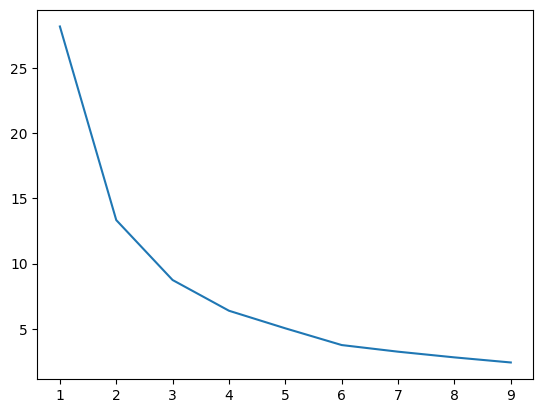

In [30]:
plt.plot(num_k, sum_error)

The optimal number of K seems to be 4 or 5. Its here the line starts to stabilize

In [31]:
df_age_score = pd.DataFrame()
df_age_score = df_age_score.assign(age = df_new["Age"])
df_age_score = df_age_score.assign(SpendingScore = df_new["Spending Score (1-100)"])

In [32]:
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init = "auto")
clu = kmeans.fit(df_age_score)

In [33]:
clu.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [34]:
kmeans.cluster_centers_

array([[0.59092606, 0.31820884],
       [0.19924663, 0.69724385]])

In [35]:
filteredlabels_0 = df_age_score[clu.labels_ == 0]
filteredlabels_1 = df_age_score[clu.labels_ == 1]
filteredlabels_2 = df_age_score[clu.labels_ == 2]
#filteredlabels_3 = df_age_score[clu.labels_ == 3]
#filteredlabels_4 = df_age_score[clu.labels_ == 4]
#filteredlabels_5 = df_age_score[clu.labels_ == 5]

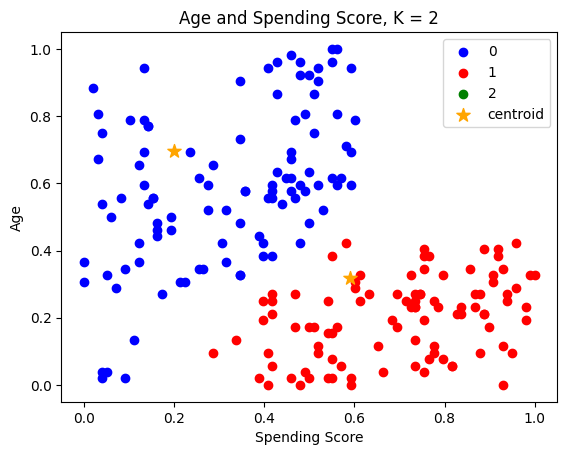

In [36]:
plt.scatter(filteredlabels_0["SpendingScore"],filteredlabels_0["age"], label = 0, color = "blue")
plt.scatter(filteredlabels_1["SpendingScore"],filteredlabels_1["age"], label = 1, color = "red")
plt.scatter(filteredlabels_2["SpendingScore"],filteredlabels_2["age"], label = 2, color = "green")
#plt.scatter(filteredlabels_3["SpendingScore"],filteredlabels_3["age"], label = 3, color = "purple")
#plt.scatter(filteredlabels_4["SpendingScore"],filteredlabels_4["age"], label = 4, color = "black")
#plt.scatter(filteredlabels_5["SpendingScore"],filteredlabels_5["age"], label = 5, color = "gray")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], label = "centroid", color ="orange", marker ="*", s = 100)

plt.title("Age and Spending Score, K = 2")
plt.xlabel("Spending Score")
plt.ylabel("Age")
plt.legend()
plt.show()

***Silhouette Score***

In [37]:
from sklearn.metrics import silhouette_score

score = silhouette_score (df_age_score, clu.labels_)
print("Score = ", score)

Score =  0.47252865228696783


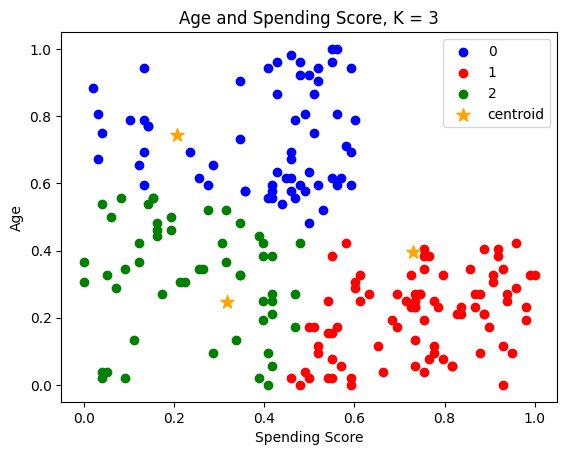

In [38]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init = "auto")
clu = kmeans.fit(df_age_score)

filteredlabels_0 = df_age_score[clu.labels_ == 0]
filteredlabels_1 = df_age_score[clu.labels_ == 1]
filteredlabels_2 = df_age_score[clu.labels_ == 2]

plt.scatter(filteredlabels_0["SpendingScore"],filteredlabels_0["age"], label = 0, color = "blue")
plt.scatter(filteredlabels_1["SpendingScore"],filteredlabels_1["age"], label = 1, color = "red")
plt.scatter(filteredlabels_2["SpendingScore"],filteredlabels_2["age"], label = 2, color = "green")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], label = "centroid", color ="orange", marker ="*", s = 100)

plt.title("Age and Spending Score, K = 3")
plt.xlabel("Spending Score")
plt.ylabel("Age")
plt.legend()
plt.show()

K = 2 --> Silhouette score: 0.472528

K = 3 --> Silhouette score: 0.431985

K = 4 --> Silhouette score: 0.435924

K = 5 --> Silhouette score: 0.421415

K = 6 --> Silhouette score: 0.4549 


***K = 2 gave the best silhouette score, however, k = 3 showed more distinctive clusters.*** 

### Batch KMEAN

In [39]:
#testing with batch kmean just to see if we can get a better result. 
sum_error = []
num_k = [num for num in range(1,10)]
for iter in num_k:
    kmeans = KMeans(n_clusters = iter, n_init="auto")
    clu = kmeans.fit(df_age_score)
    sum_error.append(clu.inertia_)
sum_error

[28.178337844315358,
 13.337690580804235,
 8.742042168276534,
 6.350049379567737,
 5.977403784900222,
 3.7665222150932673,
 3.3221623435427188,
 2.8700907927823933,
 2.460661095913599]

In [40]:
kmeans_batch = MiniBatchKMeans(n_clusters = 3, n_init="auto")
clu_batch = kmeans_batch.fit(df_age_score)

In [41]:
clu_batch.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [42]:
clu_batch.cluster_centers_

array([[0.1972567 , 0.71463462],
       [0.4296903 , 0.20537497],
       [0.74780859, 0.46873517]])

In [43]:
filteredlabels_0 = df_age_score[clu_batch.labels_ == 0]
filteredlabels_1 = df_age_score[clu_batch.labels_ == 1]
filteredlabels_2 = df_age_score[clu_batch.labels_ == 2]
#filteredlabels_3 = df_age_score[clu_batch.labels_ == 3]
#filteredlabels_4 = df_age_score[clu_batch.labels_ == 4]
#filteredlabels_5 = df_age_score[clu_batch.labels_ == 5]

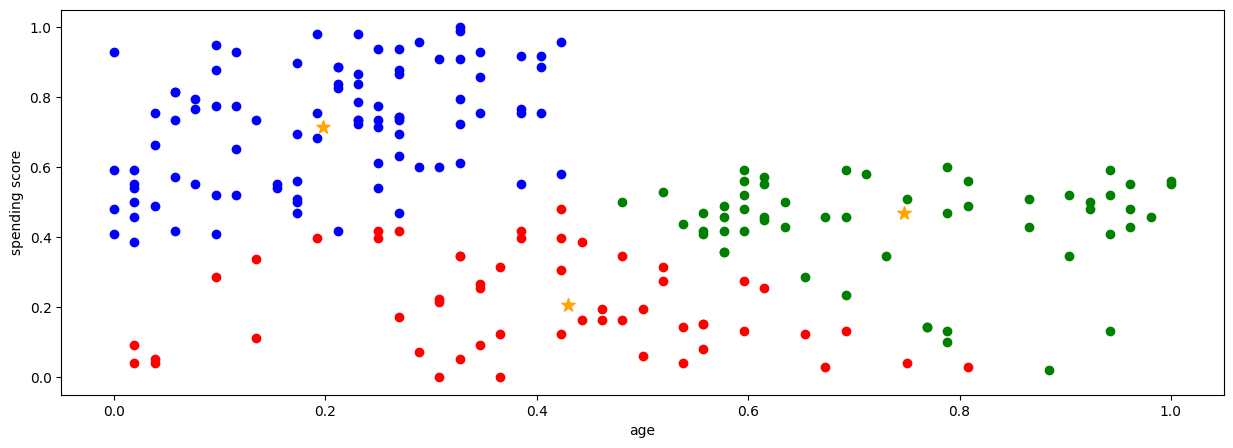

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(filteredlabels_0["age"],filteredlabels_0["SpendingScore"], label = 0, color = "blue")
plt.scatter(filteredlabels_1["age"],filteredlabels_1["SpendingScore"], label = 1, color = "red")
plt.scatter(filteredlabels_2["age"],filteredlabels_2["SpendingScore"], label = 2, color = "green")
#plt.scatter(filteredlabels_3["SpendingScore"],filteredlabels_3["age"], label = 3, color = "purple")
#plt.scatter(filteredlabels_4["SpendingScore"],filteredlabels_4["age"], label = 4, color = "black")
#plt.scatter(filteredlabels_5["SpendingScore"],filteredlabels_5["age"], label = 5, color = "gray")
plt.scatter(clu_batch.cluster_centers_[:, 0], clu_batch.cluster_centers_[:,1], label = "centroid", color ="orange", marker ="*", s = 100)

plt.xlabel("age")
plt.ylabel("spending score")
plt.show()

***Silhouette Score***

In [45]:
score = silhouette_score (df_age_score, clu_batch.labels_)
print("Score = ", score)

Score =  0.44430339498229793


K = 2 --> 0.4705

K = 3 --> 0.4398

Can see that for both batck-kmeans and k-means will the silhouette score not differ that much, around 0.1. 
Thus by using batch-kmean wont increase the performance of the clusters.

This was done for K = 2 and K = 3 because these gave the best silhouette score and "best" clusters.  

### DBSCAN

Test with DBSCAN for spending scores and age

In [46]:
df_db = pd.DataFrame()
df_db = df_db.assign(SpendingScore = df_new["Spending Score (1-100)"])
df_db = df_db.assign(age = df_new["Age"])
df_db

,SpendingScore,age
1,0.387755,0.019231
2,0.816327,0.057692
3,0.051020,0.038462
4,0.775510,0.096154
5,0.397959,0.250000
...,...,...
196,0.795918,0.326923
197,0.275510,0.519231
198,0.744898,0.269231
199,0.173469,0.269231


In [47]:
db_model = DBSCAN(eps=0.07, min_samples = 4)
db = db_model.fit_predict(df_age_score)
db

array([ 2,  0,  1,  0,  2,  0,  3,  0, -1,  0, -1,  0,  4,  0,  3,  0,  7,
       -1,  5,  0,  7,  0,  6,  0, -1,  0, -1,  0,  7,  0, -1,  0, -1, -1,
        6,  0,  6,  0,  7,  0, -1,  0,  8,  0,  5, -1,  8,  2,  2,  2,  8,
        0, -1, -1,  8,  8,  8,  9,  2,  8,  9,  2,  9, -1,  9,  2, -1,  9,
        2,  2,  9,  8,  9, -1,  9,  2, -1, -1,  2,  8,  9, -1,  9,  8,  2,
        8, -1,  2,  0,  8,  9,  2,  8, 10,  2,  2,  8,  2,  8,  2,  2,  8,
        9,  2,  8,  2,  9,  8,  9,  9,  9,  2, 10,  2,  2,  2, -1,  8,  8,
        8,  2, 10, -1,  0, -1,  0, 10,  0,  4,  0,  6,  0, -1,  0,  1,  0,
        6,  0,  1,  0, -1,  0,  2,  0, -1,  0,  8,  0,  7,  0,  6,  0,  6,
        0,  6,  0,  3,  0,  3,  0, -1,  0,  1,  0,  5,  0,  6,  0,  7,  0,
        6,  0,  3,  0,  6,  0,  4,  0,  4,  0,  7,  0,  6,  0, 10,  0,  5,
        0,  6,  0,  7,  0,  3,  0,  6,  0, -1,  0,  7,  0], dtype=int64)

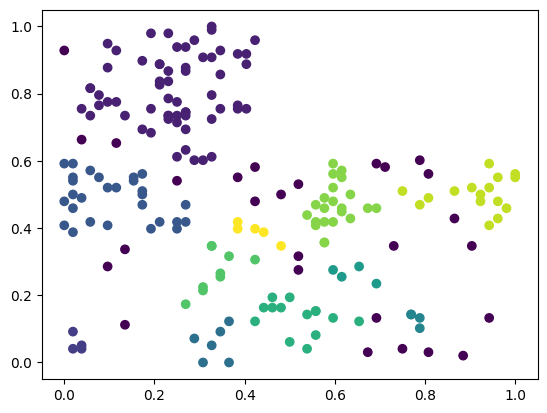

In [48]:
plt.scatter(df_db["age"], df_db["SpendingScore"], c=db)

***Silhouette Score***

In [49]:
score = silhouette_score (df_db, db_model.labels_)
print("Score = ", score)

Score =  0.33579523595354255


This was the best Silhouette score I was able to produce. 

### Agglomerative Clustering

In [50]:
df_agg = pd.DataFrame()
df_agg = df_db.assign(SpendingScore = df_new["Spending Score (1-100)"])
df_agg = df_db.assign(age = df_new["Age"])

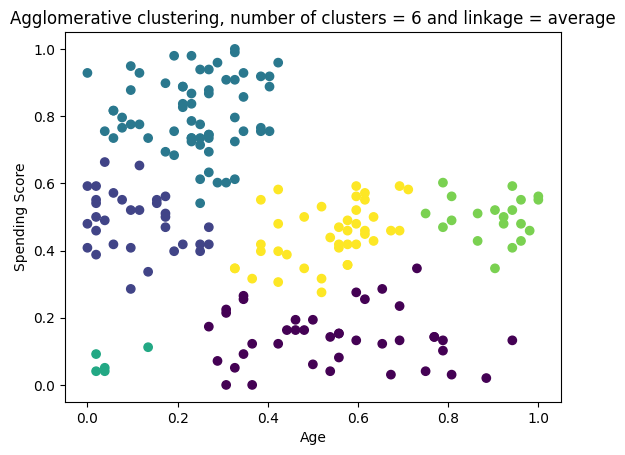

Score =  0.432580755107426


In [51]:
from sklearn.cluster import AgglomerativeClustering as AC
agg = AC(n_clusters=6,  linkage = "average")
y_agg = agg.fit_predict(df_agg)

plt.scatter(df_db["age"], df_db["SpendingScore"], c=y_agg)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Agglomerative clustering, number of clusters = 6 and linkage = average")
plt.show()

score = silhouette_score (df_agg, agg.labels_)
print("Score = ", score)

Number of clusters: 2
- Linkage = average : 0.25
- Linkage = singel : 0.25 
- Linkage = complete : 0.407

Number of clusters: 3
- Linkage = average : 0.42
- Linkage = singel :  0.084
- Linkage = complete : 0.408

Number of clusters: 4
- Linkage = average : 0.39
- Linkage = singel :  0.014
- Linkage = complete : 0.37

Number of clusters: 5
- Linkage = average : 0.38
- Linkage = singel :  -0.14
- Linkage = complete : 0.41

Number of clusters: 6
- Linkage = average : 0.43
- Linkage = singel :  -0.35
- Linkage = complete : 0.40

Cluster = 6 and and linkage function average gave the best silhouette score. 

# Results:

Best Silhouette Score:
- Kmean: 0.4725
- Batch Kmean: 0.4643
- DBScan: 0.3357
- Allgormative Clustering: 0.43

# Question 5 and 6:

5 Discuss the strengths and weaknesses of each clustering algorithm in the context of the
datase

6 Discuss your findings and propose potential applications or further steps based on your resultst


### Kmean:

    For Kmean clustering algorithm is a weakness that we must choose the number of cluster, k. This can of course be done with the elbow plot, however, it's hard to choose what kind of k is the optimal, in this case for example, one could argue for both 3 and 4. In this case did k = 2 give the best sillhouette score, but the best clusters seems to be for k=3 (with best I mean were we get 3 distinctive clusters). Another weakness is that it must chose centroids in the begining by random, this can be solved by using kmeans ++. 
    It will be sensitive towards outliers, however, no outliers was found in this dataset, thus this should not affect the result. 
    Kmeans works best when we have isotropic or spherical clusters with the same variance, in this cas are the clusters not really spherical or in equal shaps, but instead have non-regular shapes. Another problem should be the density, in this case can we see some density variations in the data, there is no compact clusters.  

    I think the biggest reason for a low silhouette score is most likley from the irregular shapes of the data but maybe also from the fact that we have no real compact clusters.

### DBSCAN:

    For DBSCAN must we chose MinPts and Eps, this can affect the result. 
    DBSCAN should solve the problems with Kmeans, such as irregular forms and should be more robust against noise and outliers. 
    But it will instead have problem with high dimentional data and is more computional heavy. These two problem should not affect in this case, because we have low dimensions and not that many datapoints, thus the computation should not be large. 

    It can have problems if the density varies to much between the clusters. This can some what be seen in the data, so I guess this mostly affects the result. 
    

### Agglomerative Clustering:

    For this algorithm did I get the best result when number of clusters was 6 and linkage methods was average. I stopped at number of clusters = 6 mostly because of time, and I didn't see any significant changes in the result with more clusters.  

    One big problem with this algorithm is the time complexity, they are computationally expensive. However, in this case should it not be a problem. 
    It is sensitive to outliers and noise, but should in this can also not affect the model. 
    It does not have problem to choose the initial points and no problem of getting in a local minimum because these are not a optimization algorithm.
    It is good if the data is structured in an hierarchy. 

    The method is sensitive towards non-globular shapes and clusters of different sizes. This can affect the result here, because the shape of the data is not globular and we also gets different sizes of the clusters. 
    In this case will the linkage method also affect the result, I did get the best reslut with "average" and worst with "single". 

    For this case, would I say that the low silhouette score comes from the fact that we dont really have any hierarchical data and we dont really have a globular shaped data, the clusters are also in different sizes.  


### Potential applications
By recognising the groups of people could further analysis be deployed, ex look att what they are buying, is there specific days they spend most on? and if there is other variables that could affect this. 

This could later be used to maybe target specific groups with specific ads, ex for those that spends most and are young could maybe get a bonuses for "young people stuff" because they are spending more (and then hoppfuly they continue to spend) or maybe target younger people that spends less where they get discounts (and then hoppfuly they will spend more) etc.

***Sources:***
    
    - PowerPoint.
    
    - https://www.ceom.ou.edu/media/docs/upload/Pang-Ning_Tan_Michael_Steinbach_Vipin_Kumar_-_Introduction_to_Data_Mining-Pe_NRDK4fi.pdf 
    
    - https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages
    
    - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#final-remarks 
    
    

    

    